In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import pandas as pd
import seaborn as sns
import os
import numpy as np
print(sys.executable)

C:\Users\NjordSoevik\Anaconda3\envs\data-science-projects\python.exe


In [2]:
train=pd.read_csv(r'C:\Users\NjordSoevik\Anaconda3\envs\data-science-projects\Titanic\data\train.csv')
test=pd.read_csv(r'C:\Users\NjordSoevik\Anaconda3\envs\data-science-projects\Titanic\data\test.csv')
gender_submission=pd.read_csv(r'C:\Users\NjordSoevik\Anaconda3\envs\data-science-projects\Titanic\data\gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
len(train),len(test),len(gender_submission)

(891, 418, 418)

In [8]:
def missing_vals(df):
    df_l=len(df)
    missing_vals={}
    for col in df.columns:
        total_col=df[col].value_counts().sum()
        missing_vals[col]=df_l-total_col
    return missing_vals

missing_vals(train)
#train.isnull().sum()

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [9]:
df_bin=pd.DataFrame()
df_con=pd.DataFrame()

In [10]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


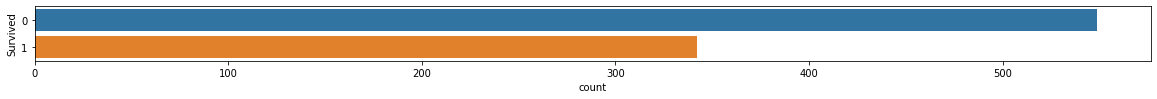

In [11]:
fig=plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [12]:
df_bin['Survived']=train['Survived']
df_con['Survived']=train['Survived']

In [13]:
# Pclass check if they are all valid 1-3 ints

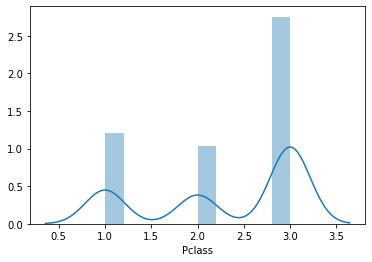

In [14]:
sns.distplot(train.Pclass)

In [15]:
df_bin['Pclass']=train['Pclass']
df_con['Pclass']=train['Pclass']

## Names

In [16]:
train.Name.value_counts()

Baumann, Mr. John D                                   1
Duane, Mr. Frank                                      1
Johansson, Mr. Erik                                   1
Sedgwick, Mr. Charles Frederick Waddington            1
Watson, Mr. Ennis Hastings                            1
                                                     ..
McGovern, Miss. Mary                                  1
Spencer, Mrs. William Augustus (Marie Eugenie)        1
Coutts, Master. Eden Leslie "Neville"                 1
Frauenthal, Mrs. Henry William (Clara Heinsheimer)    1
Taussig, Miss. Ruth                                   1
Name: Name, Length: 891, dtype: int64

## Sex

0    549
1    342
Name: Survived, dtype: int64


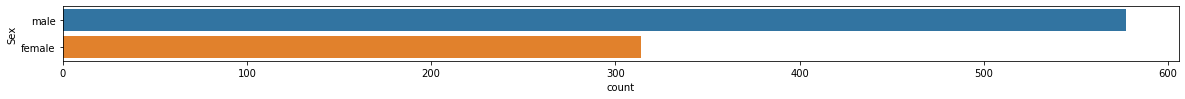

In [17]:
fig=plt.figure(figsize=(20,1))
sns.countplot(y='Sex', data=train);
print(train.Survived.value_counts())

In [18]:
# Change to binary
df_bin['Sex']=train['Sex']
df_con['Sex']=train['Sex']
df_bin['Sex']=np.where(df_bin['Sex']=='female',1,0)

In [19]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


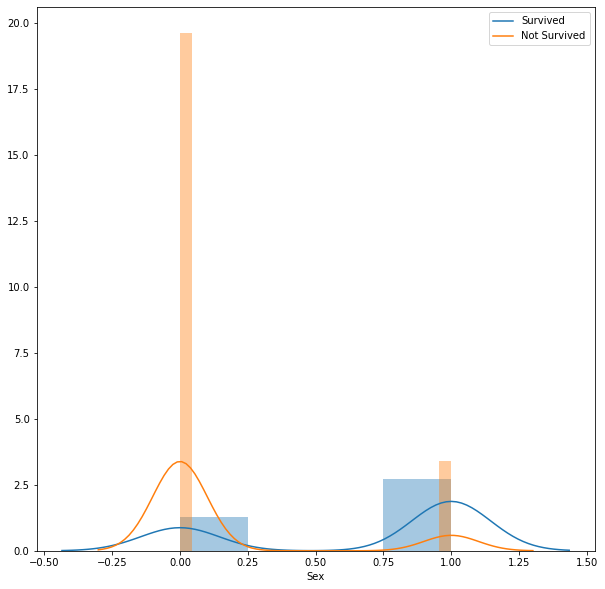

In [20]:
# Sex vs survival
fig=plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'],kde_kws={'label':'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Sex'],kde_kws={'label':'Not Survived'});


## Age

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

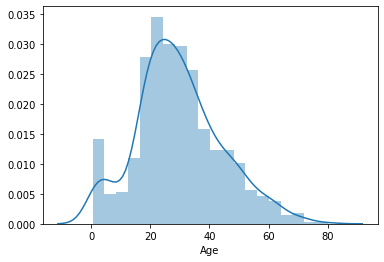

In [21]:
sns.distplot(train['Age'])
train['Age'].describe()

Create age exists column as a flag if the data exists

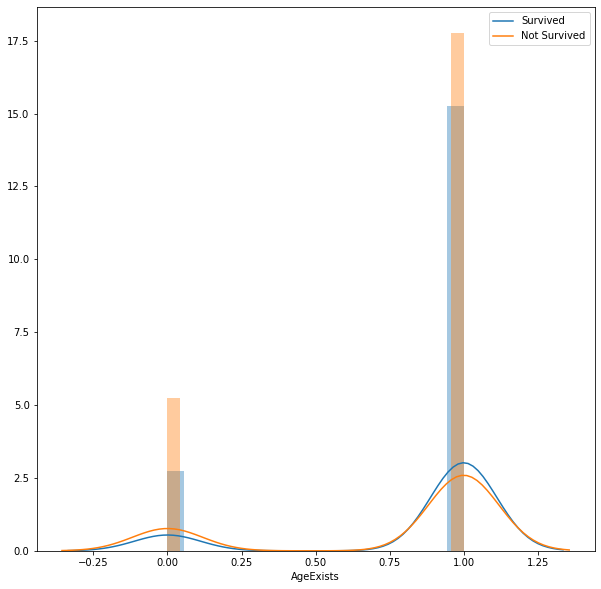

In [22]:
train['AgeExists']=train['Age'].apply(lambda x: 1 if x>0 else 0)
train['Age'].replace(np.NaN, train['Age'].mean(),inplace=True)
df_con['Age'],df_con['AgeExists']=train['Age'],train['AgeExists']
df_bin['Age'],df_bin['AgeExists']=pd.cut(train['Age'],bins=8),train['AgeExists']


fig=plt.figure(figsize=(10,10))
sns.distplot(df_con.loc[df_con['Survived']==1]['AgeExists'],kde_kws={'label':'Survived'});
sns.distplot(df_con.loc[df_con['Survived']==0]['AgeExists'],kde_kws={'label':'Not Survived'});

See no clear relation to age existing and survival

## SibSp

In [23]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [24]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

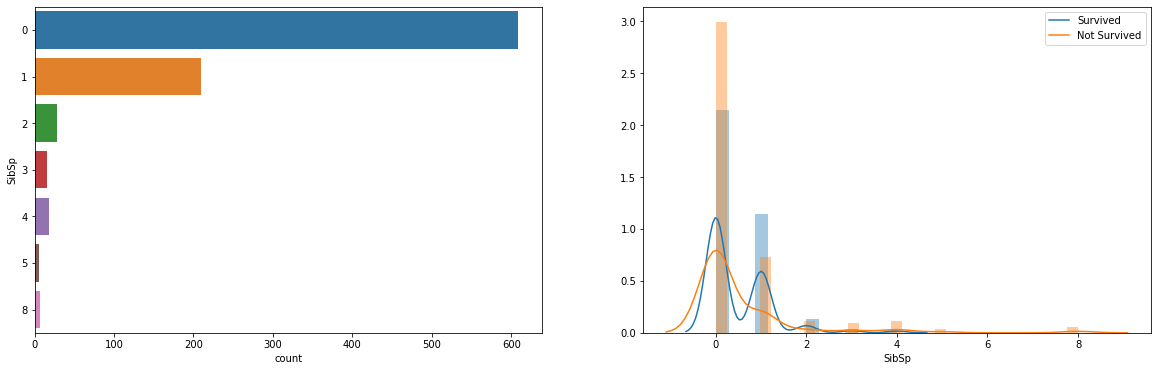

In [25]:
fig=plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(y='SibSp', data=train);
plt.subplot(1,2,2)
sns.distplot(df_bin.loc[df_bin['Survived']==1]['SibSp'],kde_kws={'label':'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived']==0]['SibSp'],kde_kws={'label':'Not Survived'});

## Parch

In [26]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

Ticket number (ignore for now)

## Fare

In [27]:
print(len(train.Fare.unique()))

248


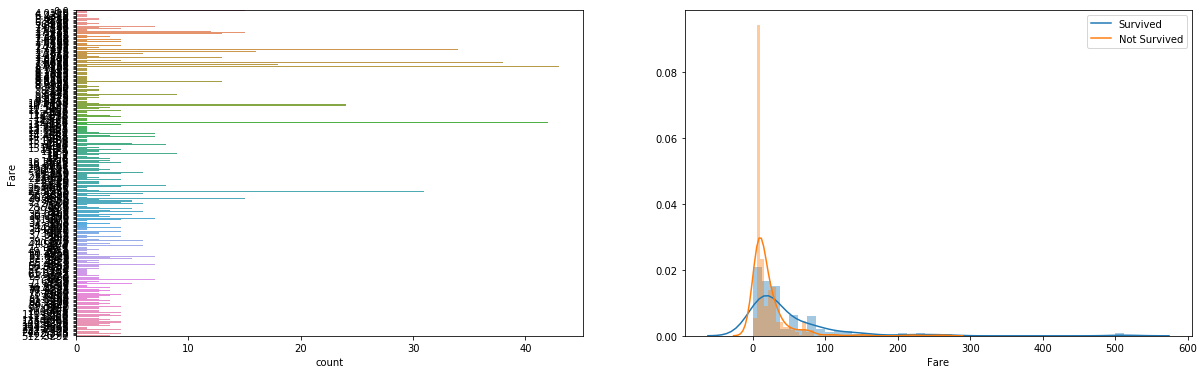

In [32]:
fig=plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(y='Fare', data=train);
plt.subplot(1,2,2)
sns.distplot(df_con.loc[df_bin['Survived']==1]['Fare'],kde_kws={'label':'Survived'});
sns.distplot(df_con.loc[df_bin['Survived']==0]['Fare'],kde_kws={'label':'Not Survived'});

In [34]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 

def replaceFare(x):
    if x<8:
        return 0
    elif 8<=x<14:
        return 1
    elif 14<=x<40:
        return 3
    else:
        return 4
    
df_bin['Fare']= train['Fare'].apply(replaceFare)


df_bin.Fare.value_counts()

3    279
0    241
1    195
4    176
Name: Fare, dtype: int64

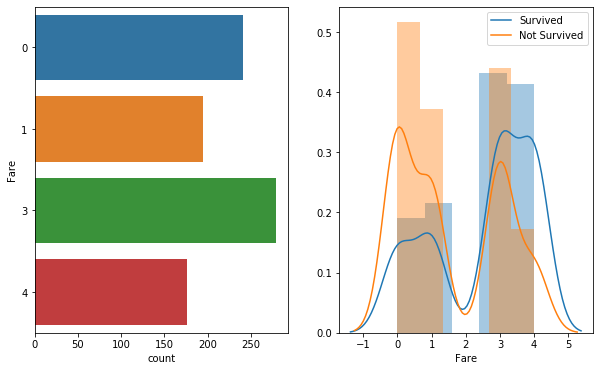

In [37]:
fig=plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(y='Fare', data=df_bin);
plt.subplot(1,2,2)
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Fare'],kde_kws={'label':'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Fare'],kde_kws={'label':'Not Survived'});